# WTM ALGIERS AI Bootcamp / Unsupervised Learning



## Goals
In this notebook you will:
* Learn (or revise) and understand the K-means algorithm
* Implement a simple K-means algorithm

## Steps

 we will have an overview about K-means then implement a simple version of it.


# 1. K-means
## 1.1. Introduction
Clustering is a typical and well-known type of unsupervised learning. Clustering algorithms try to find natural groupings in data. Similar data points (according to some notion of similarity) are considered in the same group. We call these groups **clusters**.

K-Means clustering is a simple and widely-used clustering algorithm. Given value of $k$, it tries to build $k$ clusters from samples in the dataset. Therefore, $k$ is an hyperparameter of the model. The right value of $k$ is not easy to determine, as it highly depends on the data set and the way that data is featurized.

To measure the similarity between any two data points, K-means requires the definition of a distance function between data points. What is a distance? It is a value that indicates how close two data points are in their space. In particular, when data points lie in a $d$-dimensional space, the Euclidean distance is a good choice of a distance function, and is supported by MLLIB.



## 1.2. How does it work?
Given $k$, the K-means algorithm works as follows:

1. Randomly choose $k$ data points (seeds) to be the initial centroids
2. Assign each data point to the **closest centroid**
3. Re-compute (update) the centroids using the current cluster memberships
4. If a convergence criterion is not met, go to step 2

We can also terminate the algorithm when it reaches an iteration budget, which yields an approximate result.
From the pseudo-code of the algorithm, we can see that K-means clustering results can be sensitive to the order in which data samples in the data set are explored. A sensible practice would be to run the analysis several times, randomizing objects order; then, average the cluster centers of those runs and input the centers as initial ones for one final run of the analysis.

## 1.3. Illustrative example
One of the best ways to study an algorithm is trying implement it.
In this section, we will go step by step to implement a simple K-means algorithm.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

### Question 1

#### Question 1.1
<div class="alert alert-info">

Complete the below function to calculate an Euclidean distance between any two points in $d$-dimensional data space

</div>

<div class="alert alert-warning">
We just implement the definition of euclidean distance, according to the formula:
<br>
$d(\textbf{p1},\textbf{p2}) = \sqrt{\sum_{i=1}^{n}{(q_i-p_i)^2}}$
<br>
Where p1 and p2 are two n-dimensional points.
</div>

In [1]:
import numpy as np

# calculate distance between two d-dimensional points
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum([(x1 - x2)**2 for (x1, x2) in zip(p1, p2)]))

# test our function
assert (round(euclidean_distance([1,2,3] , [10,18,12]), 2) == 20.45), "Function's wrong"

#### Question 1.2
<div class="alert alert-info">

Given a data point and the current set of centroids, complete the function below to find the index of the closest centroid for that data point.

</div>

<div class="alert alert-warning">
We have to loop over all the centroids and compute the distance between each of them and the given point. Then we take the one with lowest distance.
</div>

In [2]:
import sys

def find_closest_centroid(datapoint, centroids):
    # find the index of the closest centroid of the given data point.
    min_dist = sys.maxsize
    min_i = -1
    for i in np.arange(len(centroids)):
        dist = euclidean_distance(datapoint, centroids[i])
        if dist < min_dist:
            min_dist = dist
            min_i = i
    return min_i

assert(find_closest_centroid( [1,1,1], [ [2,1,2], [1,2,1], [3,1,2] ] ) == 1), "Function's wrong"

#### Question 1.3
<div class="alert alert-info">

Write a function to randomize `k` initial centroids.

</div>

In [3]:
np.random.seed(22324)

# randomize initial centroids
def randomize_centroids(data, k):
    centroids = data
    np.random.shuffle(centroids)
    return centroids[:k]

assert(len(
    randomize_centroids(
        np.array([ 
            np.array([2,1,2]), np.array([1,2,1]), np.array([3,1,2]) 
             ]), 2)) == 2), "Wrong function"

#### Question 1.4
<div class="alert alert-info">

Write function `check_converge` to check the stop criteria of the algorithm.

</div>

<div class="alert alert-warning">
The algorithm stop when one of these two conditions occurs:
<ul>
<li>We reach the max number of iterations;</li>
<li>The movement of the centroids is lower or equal than a certain threshold. If we set 0 as threshold (it is the default value) we require that the centroids do not move anymore. </li>
</ul>
</div>

In [4]:
MAX_ITERATIONS = 1000

# return True if clusters have converged , otherwise, return False  
def check_converge(centroids, old_centroids, num_iterations, threshold=0):
    # if it reaches an iteration budget
    if num_iterations >= MAX_ITERATIONS:
        return True
    # check if the centroids don't move (or very slightly)
    dist = 0
    for c1, c2 in zip(centroids, old_centroids):
        dist += euclidean_distance(c1, c2)
    if dist < threshold:
        return True
    return False

#### Question 1.5
<div class="alert alert-info">

Write function `update_centroid` to update the new positions for the current centroids based on the position of their members.

</div>

<div class="alert alert-warning">
For each cluster, the new position of the centroid is computed performing the mean of the positions of all the points of the cluster.
</div>

In [5]:
# centroids: a list of centers
# cluster: a list of k elements. Each element i-th is a list of data points that are assigned to center i-th
def update_centroids(centroids, cluster):
    
    new_centroids = []
    for i in range(len(centroids)):
        new_centroids.append( list(np.average(cluster[i],axis=0)) )
    
    return new_centroids

#### Question 1.6
<div class="alert alert-info">

Complete the K-means algorithm skeleton below, with the functions you wrote above.

</div>

<div class="alert alert-warning">
The k-means algorithm is quite simple from the logical point of view: starting from the initial set of centroids (that can be given or generated ranomly), it assigns each point to the closest cluster and updates the centroids looping until one of the termination conditions is met.
</div>

In [6]:
# data : set of data points
# k : number of clusters
# centroids: initial list of centroids
def kmeans(data, k=2, centroids=None):
    
    # randomize the centroids if they are not given
    if not centroids:
        centroids = randomize_centroids(data, k)

    iterations = 0
    while True:
        iterations += 1

        # init empty clusters
        clusters = [[] for i in range(k)]

        # assign each data point to the closest centroid
        for point in data:
            # find the closest center of each data point
            centroid_idx = find_closest_centroid(point, centroids)
            
            # assign datapoint to the closest cluster
            clusters[centroid_idx].append(point)
        
        # keep the current position of centroids before changing them
        old_centroids = centroids[:]
        
        # update centroids
        centroids = update_centroids(centroids, clusters)
        
        # if the stop criteria are met, stop the algorithm
        if check_converge(centroids, old_centroids, iterations, 0.1):
            break
    
    return centroids

Next, we will test our algorithm on [Fisher's Iris dataset](http://en.wikipedia.org/wiki/Iris_flower_data_set), and plot the resulting clusters in 3D.

#### Question 1.7
<div class="alert alert-info">

The code below can be used to test your algorithm with three different datasets: `Iris`, `Moon` and `Blob`.
Run your algorithm to cluster datapoints in these datasets, plot the results and discuss about them. Do you think that our algorithm works well? Why?

</div>

/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


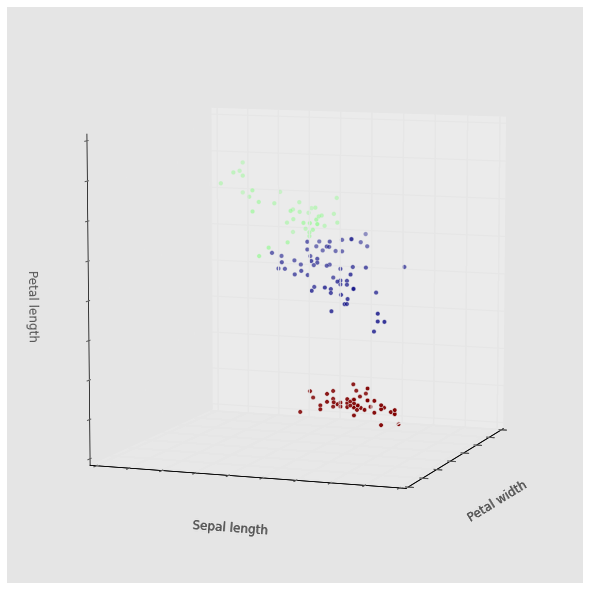

In [16]:
# the sourcecode in this cell is inspired from 
# https://gist.github.com/bbarrilleaux/9841297

%matplotlib inline

from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# load data
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
# do the clustering
centers = kmeans(X_iris, k=3)
labels = [find_closest_centroid(p, centers) for p in X_iris]

#plot the clusters in color
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()
ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=labels)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

plt.show()

<div class="alert alert-warning">
In this case it looks like we obtain a good result, since the clusters appear to be well defined and separated. The problem is that we tries to run this cell many times and the clusters often changed, thus the algorithm is not actually good beacuse it leads to very different results (sometimes better, sometimes worse). Anyway, this is just one example, thus we decided to search for more datasets and apply the same clustering algorithm to all of them, to have an idea of the performances while working on data with different shapes.
</div>

/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


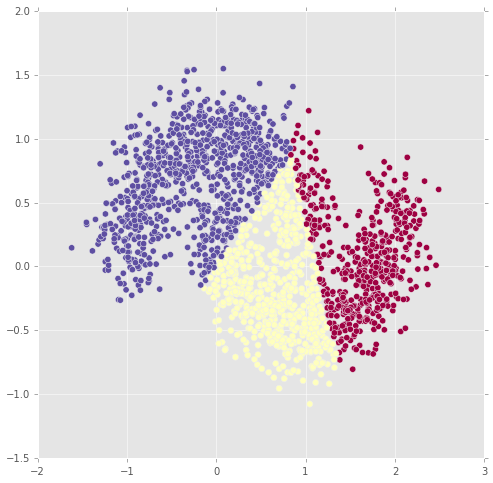

In [11]:
# moon
plt.figure(figsize=(8,8))
X, y = datasets.make_moons(2000, noise=0.2)
centers = kmeans(X, k=3)
labels = [find_closest_centroid(p, centers) for p in X]
plt.scatter(X[:,0], X[:,1], s=40, c=labels, cmap=plt.cm.Spectral)
plt.show()

<div class="alert alert-warning">
In this case we can see the three clusters and they are not overlapping, but probably it doesn't make much sense the number of clusters we have chosen.
</div>

/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


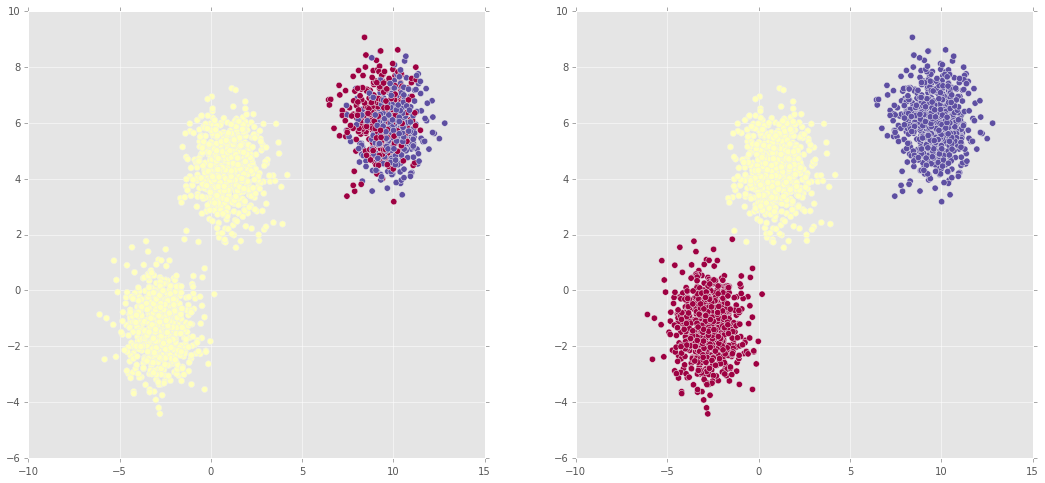

In [12]:
# blob
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
np.random.seed(0)
X, y = datasets.make_blobs(n_samples=2000, centers=3, n_features=20, random_state=0)
centers = kmeans(X, k=3)
labels = [find_closest_centroid(p, centers) for p in X]
fig = plt.figure(1, figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], s=40, c=labels, cmap=plt.cm.Spectral)

plt.subplot(1,2,2)
np.random.seed(3)
X, y = datasets.make_blobs(n_samples=2000, centers=3, n_features=20, random_state=0)
centers = kmeans(X, k=3)
labels = [find_closest_centroid(p, centers) for p in X]
fig = plt.figure(1, figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], s=40, c=labels, cmap=plt.cm.Spectral)

plt.show()

<div class="alert alert-warning">
Here we can see two completely different behaviours: in the left one the clustering algorithm worked in a terrible way, leading to 1 big yellow and the red and blue clusters are overlapping. In the second case, on the other hand, it worked well and the three clusters are well defined.
</div>

/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


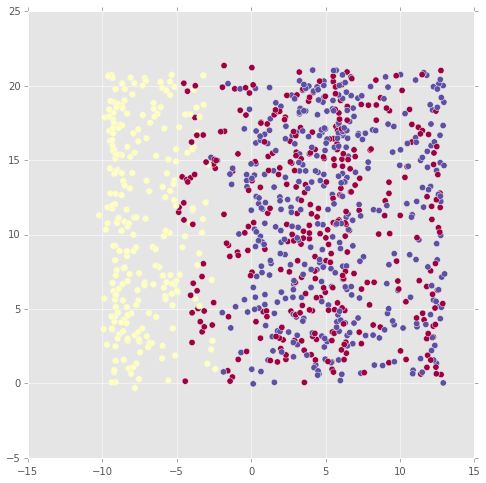

In [13]:
# Here we use sci-kit learn implementation of K-means
# centers =cluster.KMeans(n_clusters=3)
# centers.fit(X_iris) 
# labels = centers2.labels_

plt.figure(figsize=(8,8))
X, y = datasets.make_swiss_roll(1000, 0.3)
centers = kmeans(X, k=3)
labels = [find_closest_centroid(p, centers) for p in X]
plt.scatter(X[:,0], X[:,1], s=40, c=labels, cmap=plt.cm.Spectral)
plt.show()



<div class="alert alert-warning">
In this case as well the result is really bad, we can see that the yellow cluster has been identified quite well, but the red one and blue one make no sense, since they are overlapping.
</div>

/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


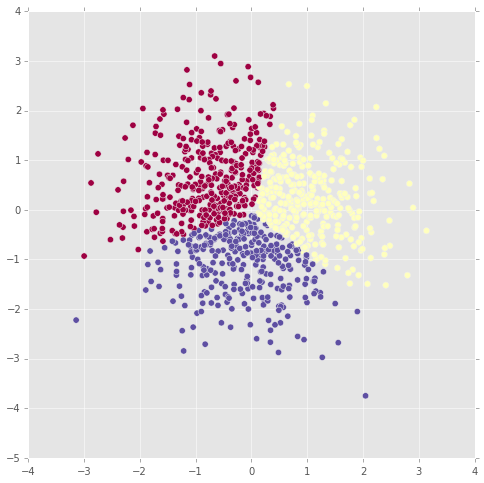

In [14]:
plt.figure(figsize=(8,8))
X, y = datasets.make_gaussian_quantiles(n_samples=1000)
centers = kmeans(X, k=3)
labels = [find_closest_centroid(p, centers) for p in X]
plt.scatter(X[:,0], X[:,1], s=40, c=labels, cmap=plt.cm.Spectral)
plt.show()

<div class="alert alert-warning">
In this last case the algorithm worked quite well, we can see three different clusters and there aren't problems such as overlapping clusters or similar. In this case the value three maybe was not the most useful one though.
</div>